In [27]:
%load_ext autoreload
 
%autoreload 2

In [2]:
from pfs.lam.opdb import *

In [28]:
from Cluster_GetImqual2csvDev import main as getImqual
from Cluster_GetBestFocusPlanefromCsvDev import main as getBestFocus

In [8]:
from multiprocessing import Pool
import time
import os

# Limit the number of core 
## otherwise affect to None

In [5]:
MAX_PROCESS = 30

# Data to be process
to be specified:  arm, specId and visit_set_id (or experimentId)

In [4]:
site = "Subaru"
specId = 2
arm = "b"
#expId = 3396

experimentId = 30017

peaklist = "/work/fmadec/spsAIT/202312/SM2_Sub_13Dec2023_peakList.csv"
outpath = "/work/fmadec/spsAIT/202312"

In [5]:
roi_size = 24
seek_size = None
doBck = True

criteria = "EE5"
piston_index ="motor1"

cam = f"{arm}{specId}"

# DRP folder

In [10]:

#drpPath, repo, rerun = "/work/", "drp", "drpActor/CALIB"
drpPath, repo, rerun = "/data/drp", "repo", "drpActor/CALIB"



define outputs, plots


In [9]:


roiPlot = True
plotPeaksFlux = True
doFit = False
doLSF = False

In [10]:
visitStart, visitEnd = getVisitRange_fromWeb(experimentId, url="http://133.40.164.16/sps-logs/index.html")

print(visitStart, visitEnd)


102801 102825


In [11]:
def task(i, peaklist=peaklist, cam=cam, rerun=rerun, experimentId=experimentId, outpath=outpath, drpPath=drpPath, repo=repo, \
                                roi_size=roi_size, seek_size=seek_size, doBck=doBck, roiPlot=roiPlot, plotPeaksFlux=plotPeaksFlux, doFit=doFit, doLSF=doLSF):
    return getImqual(i, peaklist, cam, rerun, experimentId, outpath, drpPath, repo, \
                                roi_size, seek_size, doBck, roiPlot, plotPeaksFlux, doFit, doLSF)


In [12]:
visitIds = range(visitStart, visitEnd+1)
print(f"{len(visitIds)} visits")

25 visits


In [13]:
MAX_PROCESS = os.cpu_count() if MAX_PROCESS is None else MAX_PROCESS
print(MAX_PROCESS)

30


In [14]:
if __name__ == '__main__':
    pool_size = min(os.cpu_count(), len(visitIds), MAX_PROCESS)
    p = Pool(processes = pool_size)
    start = time.time()
    async_result = p.map_async(task, visitIds)
    p.close()
    p.join()
    print("Complete")
    end = time.time()
    print('total time (s)= ' + str(end-start))

/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetImqual2csvDev.py:65: FutureWarning: Gen2 Butler has been deprecated (PfsButler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler( os.path.join(repoRoot, "rerun", rerun)) #, calibRoot=os.path.join(repoRoot, "CALIB"))
/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetImqual2csvDev.py:65: FutureWarning: Gen2 Butler has been deprecated (PfsButler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler( os.path.join(repoRoot, "rerun", rerun)) #, calibRoot=os.path.join(repoRoot, "CALIB"))
/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetImqual2csvDev.py:65: FutureWarning: Gen2 Butler has been deprecated (PfsButler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler( os.path.join(repoRoot, "rerun", rerun)) #,

lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/repo/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /data/drp/repo/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /data/drp/repo/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /data/drp/repo/CALIB/calibRegistry.sqlite3
lsst.CameraMapper I

# Best Focus 

In [16]:
filtered_waves = None #[763.7208,912.5471]
#filtered_waves = [912.5471]
#filtered_waves = [970.688]

In [31]:
filtered_waves = filtered_waves if filtered_waves is None else np.array(filtered_waves)
getBestFocus(experimentId, cam, rerun, criteria, outpath, drpPath, repo, roi_size, doBck, piston_index, filtered_waves)


/home/fmadec/devel/lam_sps_analysis/python/pfs/lam/detFocusAnalysis.py:12: UserWarning: registration of accessor <class 'pfs.lam.detFocusAnalysis.thFocusAccessor'> under name 'thFocus' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class thFocusAccessor:


2023-12-13T05h00
/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/

/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/Imquality_b2_Exp30017*

Wavelength used: [404.7708 577.121  546.2268 579.2276 435.956 ]
[  2  32 111 223 289 418 518 621 650] [404.7708 435.956  546.2268 577.121  579.2276]
write ThFocus plot png file: /work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/Exp30017_thfocus_fit_bounds_086_163_err_max_motor1_2023-12-13T05h00 

Spatial Tip 7.654e-05 rad => 4.7 microns
Spectral Tilt 6.461e-04 rad => 40.5 microns
bestFocus 218.5 microns
2023-12-13 05:00:54.560343 
/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/
ExpId 30017
InvMat_sm1_B1_02oct2020.mat
[217.38063241 236.63755035 204.16334064]
xcu_b2 motors moveCcd a=217.38 b=236.64 c=204.16 microns abs
Tip 7.654e-05 rad => 4.7 microns
Tilt 6.461e-04 rad => 40.5 microns
218.5 microns



/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetBestFocusPlanefromCsvDev.py:185: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_groups(piston_filtered.sort_values("motor1")[piston_filtered.EE5_nbh_flag], experimentId, dataPath, plot_prefix=plot_prefix, title_suffix=title_suffix,\


write png file: 
 /work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/Focus_Piston_plots_doBckTrue_EE5_bounds_086_163_err_max_motor1_fiber_wavelength_Exp30017_2023-12-13T05h00.png


/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetBestFocusPlanefromCsvDev.py:187: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_groups(piston_filtered.sort_values("motor1")[piston_filtered.EE5_nbh_flag], experimentId, dataPath, plot_prefix=plot_prefix, title_suffix=title_suffix,\


# Check throughFocus plot:
and Use filtered_waves above if needed  and recalculate the best focus

Copy paste the image path from the line <b>write ThFocus plot png file:</b> above (and add .png)

In [36]:
thFocusPlot = "/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/Exp30017_thfocus_fit_bounds_086_163_err_max_motor1_2023-12-13T05h00.png"

In [33]:
from IPython.display import display, Image

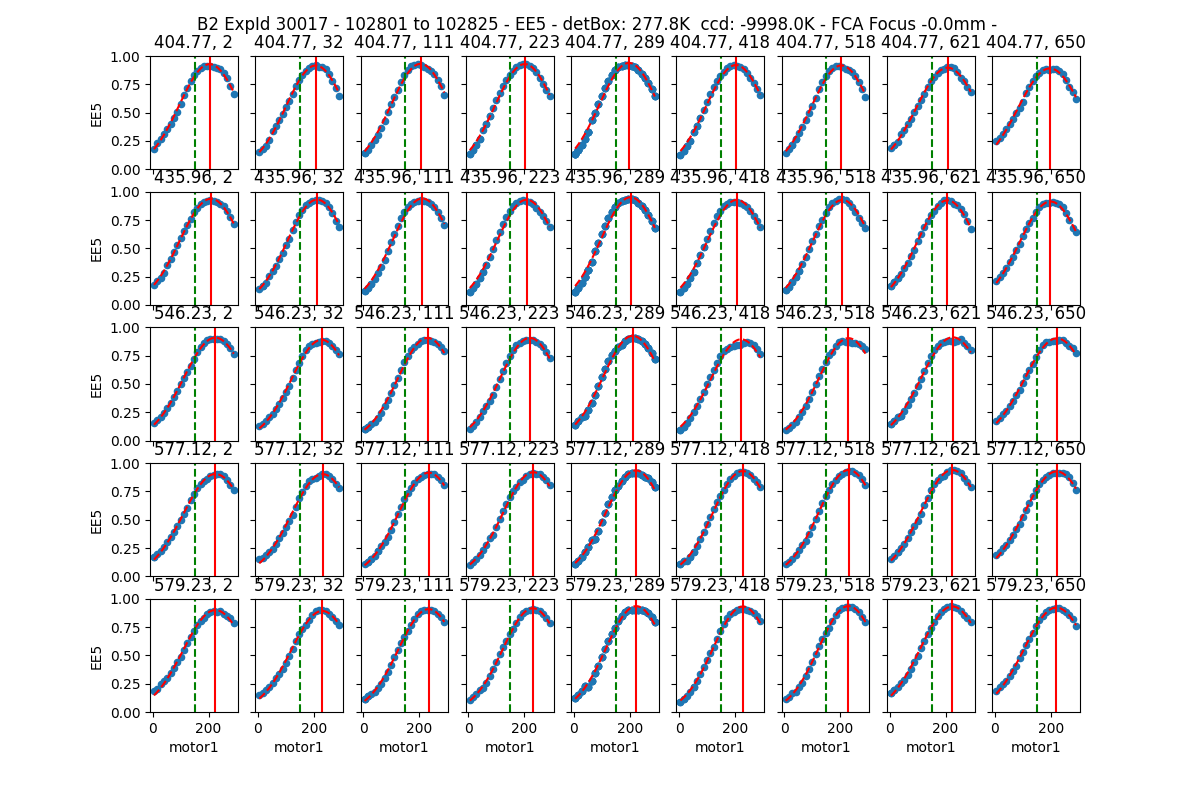

In [34]:
display(Image(thFocusPlot))

In [37]:
testPath =  "/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/"